In [1]:
#!/user/bin/env python
# coding: utf-8
# author: Li Wei
# date: 2020/04/12
# do the classification task with LDA_OLS, probit regression and generalized model, and compare the results


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataloader import DataLoader
from LDA_OLS import LDA_OLS
from LDA_PR import LDA_PR
from LDA_PGM import LDA_PGM
from utls import *

# setting jupyter display to show all columns
pd.set_option('display.max_columns',10000)

In [2]:
# defind the path config
data_path = 'data\Ionosphere+Dataset.csv'
model_save_path = 'checkpoints/'
result_save_path = 'results/'

# load the data
data_loader = DataLoader(data_path)
train_set,test_set = data_loader.data_split()  # train_set and test_set are tuple type as (features,labels)
train_feautres,train_labels = np.array(train_set[0]),np.array(train_set[1])
test_features,test_labels = np.array(test_set[0]),np.array(test_set[1])
print('the train set shape is:',train_feautres.shape,train_labels.shape)
print('the test set shape is:',test_features.shape,test_labels.shape)
print("the feature and label example is as follows:\n",train_set[0][0],train_set[1][0])

the train set shape is: (200, 34) (200, 1)
the test set shape is: (151, 34) (151, 1)
the feature and label example is as follows:
 [1.0, 0.0, 0.99539, -0.05889, 0.85243, 0.02306, 0.83398, -0.37708, 1.0, 0.0376, 0.85243, -0.17755, 0.59755, -0.44945, 0.60536, -0.38223, 0.84356, -0.38542, 0.58212, -0.32192, 0.56971, -0.29674, 0.36946, -0.47357, 0.56811, -0.51171, 0.41078, -0.46168, 0.21266, -0.3409, 0.42267, -0.54487, 0.18641, -0.453] [1]


In [3]:
# preparation for the model training
input_dim = train_feautres.shape[1]             # input dimension
output_dim = train_labels.shape[1]              # output dimension

In [4]:
# train the LDA_OLS model
lda_ols = LDA_OLS(input_dim=input_dim,output_dim=output_dim )
lda_ols.fit(train_feautres,train_labels)
print("the model weight matrix shape: {0}\nthe bias matrix shape: {1}.".format(lda_ols.get_w().shape,lda_ols.get_b().shape))

the model weight matrix shape: (34, 1)
the bias matrix shape: (1, 1).


In [5]:
# test the LDA_OLS model
train_error_rate_for_LDA_OLS = test(lda_ols,train_feautres,train_labels)
test_error_rate_for_LDA_OLS = test(lda_ols,test_features,test_labels)
print("train error rate: {0}\ntest error rate: {1}".format(train_error_rate_for_LDA_OLS,test_error_rate_for_LDA_OLS))

train error rate: 0.125
test error rate: 0.09271523178807947


epoch: 1000 loss: 0.2494896696372828
epoch: 2000 loss: 0.22881658485763195
epoch: 3000 loss: 0.21842209307620894
epoch: 4000 loss: 0.21155166615318907
epoch: 5000 loss: 0.20641076517982002
epoch: 6000 loss: 0.20214722867599136
epoch: 7000 loss: 0.1993124382186966
epoch: 8000 loss: 0.19614110485828706
epoch: 9000 loss: 0.19370638314525027
epoch: 10000 loss: 0.19187618993265473
epoch: 11000 loss: 0.19024698182970604
epoch: 12000 loss: 0.18830465860324505
epoch: 13000 loss: 0.18706451442461539
epoch: 14000 loss: 0.1856482807129484
epoch: 15000 loss: 0.18459453491730163
epoch: 16000 loss: 0.18355049525574402
epoch: 17000 loss: 0.18254901013026537
epoch: 18000 loss: 0.18175082801043743
epoch: 19000 loss: 0.18091703081661448
epoch: 20000 loss: 0.18013729731835745
weight: [[ 6.47804941e+00]
 [ 0.00000000e+00]
 [ 8.87404305e-01]
 [ 1.78063496e-01]
 [ 2.45062157e+00]
 [ 1.58150450e+00]
 [ 1.37544328e-01]
 [ 1.95484519e+00]
 [ 5.23627031e-01]
 [ 1.42690342e-01]
 [-4.54798577e-01]
 [-3.71382112e-

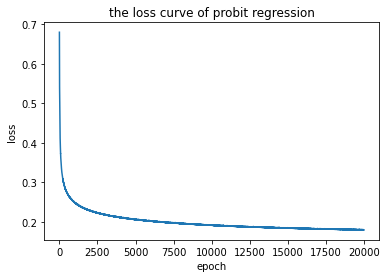

the model weight matrix shape: (34, 1)
the bias matrix shape: (1, 1).


In [6]:
# train the probit regression model
lda_pr = LDA_PR(input_dim=input_dim,output_dim=output_dim)
all_loss = lda_pr.fit(train_feautres,train_labels,lr = 0.001,max_epoch = 20000,batch_size = 64,epsilon = 1e-6,show_parameter=True)
# display the loss curve
plt.plot(np.array(all_loss).flatten(),label='loss')
plt.title('the loss curve of probit regression')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
print("the model weight matrix shape: {0}\nthe bias matrix shape: {1}.".format(lda_pr.get_w().shape,lda_pr.get_b().shape))

In [7]:
# test  the probit regression model
train_error_rate_for_lda_pr = test(lda_pr,train_feautres,train_labels)
test_error_rate_for_lda_pr = test(lda_pr,test_features,test_labels)
print("train error rate: {0}\ntest error rate: {1}".format(train_error_rate_for_lda_pr,test_error_rate_for_lda_pr))

train error rate: 0.085
test error rate: 0.09271523178807947


In [8]:
# train the LDA_PGM model 
lda_pgm = LDA_PGM(input_dim=input_dim,output_dim=output_dim)
lda_pgm.fit(train_feautres,train_labels)
print("the model weight matrix shape: {0}\nthe bias matrix shape: {1}.".format(lda_pgm.get_w().shape,lda_pgm.get_b().shape))

(34, 34)
the model weight matrix shape: (34,)
the bias matrix shape: ().


In [9]:
# test the LDA_PGM model
train_error_rate_for_lda_pgm = test(lda_pgm,train_feautres,train_labels)
test_error_rate_for_lda_pgm = test(lda_pgm,test_features,test_labels)
print("train error rate: {0}\ntest error rate: {1}".format(train_error_rate_for_lda_pgm,test_error_rate_for_lda_pgm))

train error rate: 0.125
test error rate: 0.09271523178807947


In [10]:
# show the classification result and the original data distribution
lda_ols_pred = lda_ols.predict(test_features)
lda_pr_pred = lda_pr.predict(test_features)
lda_pgm_pred = lda_pgm.predict(test_features)


max_importance_index_lda_ols = (np.argsort(lda_ols.get_w(),axis=0)[::-1][0:3]).flatten()
max_importance_index_lda_pr = (np.argsort(lda_pr.get_w(),axis=0)[::-1][0:3]).flatten()
max_importance_index_lda_pgm = (np.argsort(lda_pgm.get_w(),axis=0)[::-1][0:3]).flatten()
print("the three most important features for LDA_OLS are:",max_importance_index_lda_ols)
print("the three most important features for LDA_PR are:",max_importance_index_lda_pr)
print("the three most important features for LDA_PGM are:",max_importance_index_lda_pgm)

# get the the index of label 1 and label 0 for diffrent model prediction and the test set
index_of_label_1_lda_ols = np.where(lda_ols_pred>=0.5)[0].tolist()
index_of_label_0_lda_ols = np.where(lda_ols_pred<0.5)[0].tolist()
index_of_label_1_lda_pr = np.where(lda_pr_pred>=0.5)[0]
index_of_label_0_lda_pr = np.where(lda_pr_pred<0.5)[0]
index_of_label_1_lda_pgm = np.where(lda_pgm_pred>=0.5)[0]
index_of_label_0_lda_pgm = np.where(lda_pgm_pred<0.5)[0]
index_of_label_1_test = np.where(test_labels==1)[0]
index_of_label_0_test = np.where(test_labels==0)[0]

print("the number of label 1 in the prediction of LDA_OLS is:",len(index_of_label_1_lda_ols))
print("the number of label 0 in the prediction of LDA_OLS is:",len(index_of_label_0_lda_ols))

the three most important features for LDA_OLS are: [0 6 2]
the three most important features for LDA_PR are: [ 0  4 28]
the three most important features for LDA_PGM are: [0 6 2]
the number of label 1 in the prediction of LDA_OLS is: 128
the number of label 0 in the prediction of LDA_OLS is: 23


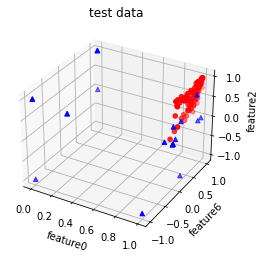

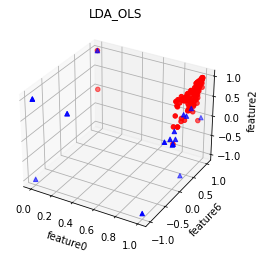

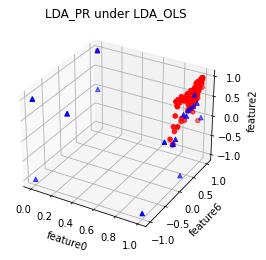

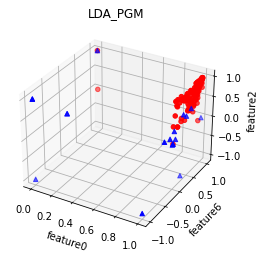

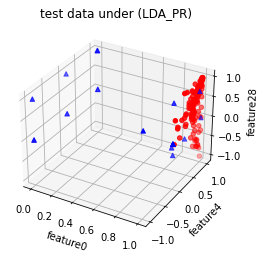

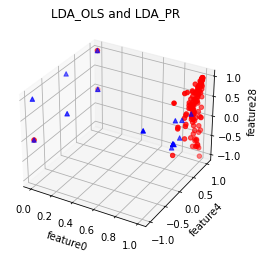

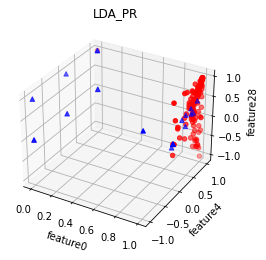

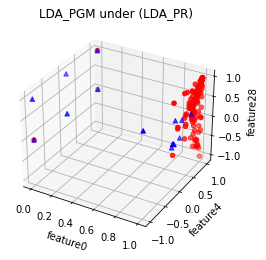

In [11]:

# show the prediction result of the three models, with different colors and shapes to distinguish different labels

# for test data under LDA_OLS set
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_test,max_importance_index_lda_ols[0]],test_features[index_of_label_1_test,max_importance_index_lda_ols[1]],test_features[index_of_label_1_test,max_importance_index_lda_ols[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_test,max_importance_index_lda_ols[0]],test_features[index_of_label_0_test,max_importance_index_lda_ols[1]],test_features[index_of_label_0_test,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("test data")
plt.show()

# for LDA_OLS
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_lda_ols,max_importance_index_lda_ols[0]],test_features[index_of_label_1_lda_ols,max_importance_index_lda_ols[1]],test_features[index_of_label_1_lda_ols,max_importance_index_lda_ols[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_ols,max_importance_index_lda_ols[0]],test_features[index_of_label_0_lda_ols,max_importance_index_lda_ols[1]],test_features[index_of_label_0_lda_ols,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("LDA_OLS")
plt.show()



# for LDA_PR
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_lda_pr,max_importance_index_lda_ols[0]],test_features[index_of_label_1_lda_pr,max_importance_index_lda_ols[1]],test_features[index_of_label_1_lda_pr,max_importance_index_lda_ols[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pr,max_importance_index_lda_ols[0]],test_features[index_of_label_0_lda_pr,max_importance_index_lda_ols[1]],test_features[index_of_label_0_lda_pr,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("LDA_PR under LDA_OLS")
plt.show()



# for LDA_PGM
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pgm[0]],test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pgm[1]],test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pgm[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pgm[0]],test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pgm[1]],test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pgm[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pgm[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pgm[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_pgm[2]))
ax.set_title("LDA_PGM")
plt.show()


# for test data under LDA_PR set
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_test,max_importance_index_lda_pr[0]],test_features[index_of_label_1_test,max_importance_index_lda_pr[1]],test_features[index_of_label_1_test,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_test,max_importance_index_lda_pr[0]],test_features[index_of_label_0_test,max_importance_index_lda_pr[1]],test_features[index_of_label_0_test,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("test data under (LDA_PR)")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_lda_ols,max_importance_index_lda_pr[0]],test_features[index_of_label_1_lda_ols,max_importance_index_lda_pr[1]],test_features[index_of_label_1_lda_ols,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_ols,max_importance_index_lda_pr[0]],test_features[index_of_label_0_lda_ols,max_importance_index_lda_pr[1]],test_features[index_of_label_0_lda_ols,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_OLS and LDA_PR")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_lda_pr,max_importance_index_lda_pr[0]],test_features[index_of_label_1_lda_pr,max_importance_index_lda_pr[1]],test_features[index_of_label_1_lda_pr,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pr,max_importance_index_lda_pr[0]],test_features[index_of_label_0_lda_pr,max_importance_index_lda_pr[1]],test_features[index_of_label_0_lda_pr,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_PR")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pr[0]],test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pr[1]],test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pr[0]],test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pr[1]],test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[0]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_zlabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_PGM under (LDA_PR)")
plt.show()

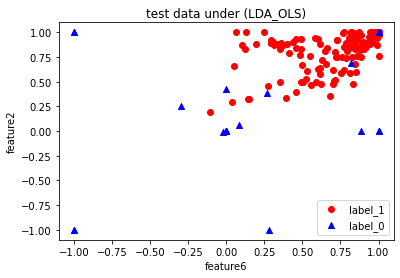

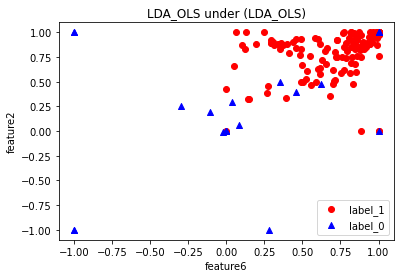

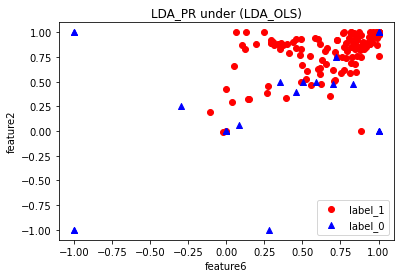

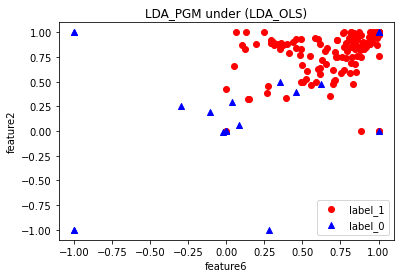

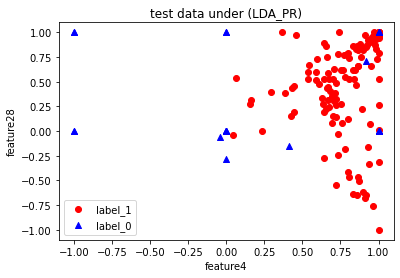

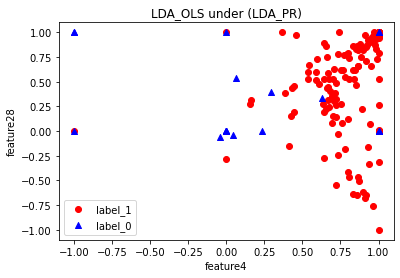

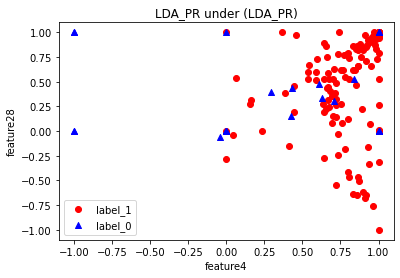

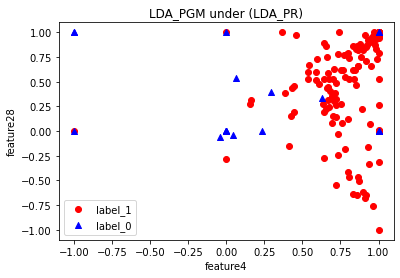

In [12]:
# for test data under LDA_OLS set 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_test,max_importance_index_lda_ols[1]],test_features[index_of_label_1_test,max_importance_index_lda_ols[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_test,max_importance_index_lda_ols[1]],test_features[index_of_label_0_test,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("test data under (LDA_OLS)")
ax.legend(['label_1','label_0'])
plt.show()

# for LDA_OLS under LDA_OLS set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_lda_ols,max_importance_index_lda_ols[1]],test_features[index_of_label_1_lda_ols,max_importance_index_lda_ols[2]],c='r',marker='o') 
ax.scatter(test_features[index_of_label_0_lda_ols,max_importance_index_lda_ols[1]],test_features[index_of_label_0_lda_ols,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("LDA_OLS under (LDA_OLS)")
ax.legend(['label_1','label_0'])
plt.show()

# for LDA_PR under LDA_OLS set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_lda_pr,max_importance_index_lda_ols[1]],test_features[index_of_label_1_lda_pr,max_importance_index_lda_ols[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pr,max_importance_index_lda_ols[1]],test_features[index_of_label_0_lda_pr,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("LDA_PR under (LDA_OLS)")
ax.legend(['label_1','label_0'])
plt.show()

# for LDA_PGM under LDA_OLS set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_lda_pgm,max_importance_index_lda_ols[1]],test_features[index_of_label_1_lda_pgm,max_importance_index_lda_ols[2]],c='r',marker='o')   
ax.scatter(test_features[index_of_label_0_lda_pgm,max_importance_index_lda_ols[1]],test_features[index_of_label_0_lda_pgm,max_importance_index_lda_ols[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_ols[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_ols[2]))
ax.set_title("LDA_PGM under (LDA_OLS)")
ax.legend(['label_1','label_0'])
plt.show()

# for test data under LDA_PR set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_test,max_importance_index_lda_pr[1]],test_features[index_of_label_1_test,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_test,max_importance_index_lda_pr[1]],test_features[index_of_label_0_test,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("test data under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()

# for LDA_OLS under LDA_PR set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_lda_ols,max_importance_index_lda_pr[1]],test_features[index_of_label_1_lda_ols,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_ols,max_importance_index_lda_pr[1]],test_features[index_of_label_0_lda_ols,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_OLS under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()

# for LDA_PR under LDA_PR set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_lda_pr,max_importance_index_lda_pr[1]],test_features[index_of_label_1_lda_pr,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pr,max_importance_index_lda_pr[1]],test_features[index_of_label_0_lda_pr,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_PR under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()

# for LDA_PGM under LDA_PR set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pr[1]],test_features[index_of_label_1_lda_pgm,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pr[1]],test_features[index_of_label_0_lda_pgm,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_PGM under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()


the most 3 important features of train data under LDA_PR:  [ 0  4 28]
the most 3 important features of train data under LDA_PGM:  [0 6 2]


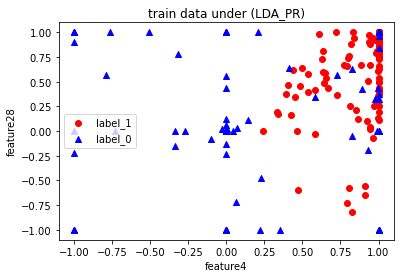

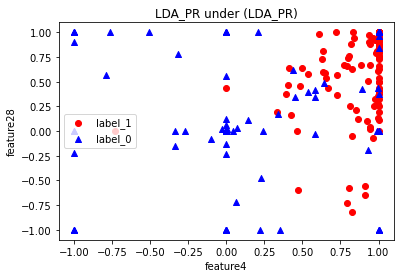

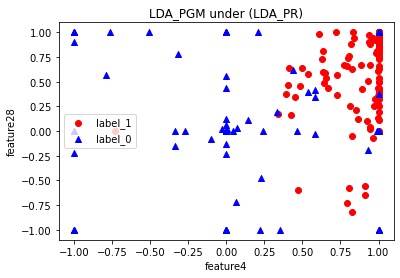

In [17]:
# get the prediction of train data
prediction_train_lda_pr = lda_pr.predict(train_feautres)
prediction_train_lda_pgm = lda_pgm.predict(train_feautres)

# get the most 3 important features of train data
max_importance_index_lda_pr =  (np.argsort(lda_pr.get_w(),axis=0)[::-1][0:3]).flatten()
max_importance_index_lda_pgm = (np.argsort(lda_pgm.get_w(),axis=0)[::-1][0:3]).flatten()
print("the most 3 important features of train data under LDA_PR: ",max_importance_index_lda_pr)
print("the most 3 important features of train data under LDA_PGM: ",max_importance_index_lda_pgm)

# get the lable 1 and label0 index of train data and prediction labels of different models
index_of_label_1_train = np.where(train_labels==1)[0]
index_of_label_0_train = np.where(train_labels==0)[0]
index_of_label_1_lda_pr = np.where(prediction_train_lda_pr>=0.5)[0]
index_of_label_0_lda_pr = np.where(prediction_train_lda_pr<0.5)[0]
index_of_label_1_lda_pgm = np.where(prediction_train_lda_pgm>=0.5)[0]
index_of_label_0_lda_pgm = np.where(prediction_train_lda_pgm<0.5)[0]


# show 2D plot of LDA_PR and LDA_PGM on trainset, use the (2,3) important features
# for train data under LDA_PR set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_feautres[index_of_label_1_train,max_importance_index_lda_pr[1]],train_feautres[index_of_label_1_train,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(train_feautres[index_of_label_0_train,max_importance_index_lda_pr[1]],train_feautres[index_of_label_0_train,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("train data under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()

# for lda_pr on under lda_pr set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_feautres[index_of_label_1_lda_pr,max_importance_index_lda_pr[1]],train_feautres[index_of_label_1_lda_pr,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(train_feautres[index_of_label_0_lda_pr,max_importance_index_lda_pr[1]],train_feautres[index_of_label_0_lda_pr,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_PR under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()

# for lda_pgm on under lda_pr set
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(train_feautres[index_of_label_1_lda_pgm,max_importance_index_lda_pr[1]],train_feautres[index_of_label_1_lda_pgm,max_importance_index_lda_pr[2]],c='r',marker='o')
ax.scatter(train_feautres[index_of_label_0_lda_pgm,max_importance_index_lda_pr[1]],train_feautres[index_of_label_0_lda_pgm,max_importance_index_lda_pr[2]],c='b',marker='^')
ax.set_xlabel("feature{0}".format(max_importance_index_lda_pr[1]))
ax.set_ylabel("feature{0}".format(max_importance_index_lda_pr[2]))
ax.set_title("LDA_PGM under (LDA_PR)")
ax.legend(['label_1','label_0'])
plt.show()

